## Shortening Evaluation

In [1]:
import os
os.environ['http_proxy'] = 'http://192.41.170.23:3128'
os.environ['https_proxy'] = 'http://192.41.170.23:3128'
import sys         
sys.path.append('/home/pranisaa/working_dir/Text-Summarization')
from config import *
from score import  RougeScore
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Fine-tuned for 30 epochs

In [32]:
path = f"""../model/{model_params["MODEL"]}_{data}_full-text/"""
rougescore_fulltext = RougeScore(model = model_params["MODEL"], dataset = data, EPOCH = model_params['TRAIN_EPOCHS'], path = path)
rougescores_fulltext = rougescore_fulltext.getscore_ave()

path = f"""../model/{model_params["MODEL"]}_{data}_head-only_25/"""
rougescore_head25 = RougeScore(model = model_params["MODEL"], dataset = data, EPOCH = model_params['TRAIN_EPOCHS'], path = path)
rougescores_head25 = rougescore_head25.getscore_ave()

path = f"""../model/{model_params["MODEL"]}_{data}_head-only_35/"""
rougescore_head35 = RougeScore(model = model_params["MODEL"], dataset = data, EPOCH = model_params['TRAIN_EPOCHS'], path = path)
rougescores_head35 = rougescore_head35.getscore_ave()

path = f"""../model/{model_params["MODEL"]}_{data}_head-only_45/"""
rougescore_head45 = RougeScore(model = model_params["MODEL"], dataset = data, EPOCH = model_params['TRAIN_EPOCHS'], path = path)
rougescores_head45 = rougescore_head45.getscore_ave()

../model/t5-small_xsum_full-text/
../model/t5-small_xsum_head-only_25/
../model/t5-small_xsum_head-only_35/
../model/t5-small_xsum_head-only_45/


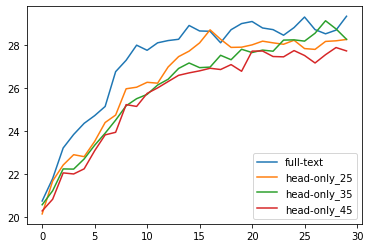

In [33]:
plt.plot(rougescores_fulltext['rouge1'], label = 'full-text')
plt.plot(rougescores_head25['rouge1'], label = 'head-only_25')
plt.plot(rougescores_head35['rouge1'], label = 'head-only_35')
plt.plot(rougescores_head45['rouge1'], label = 'head-only_45')
plt.legend()

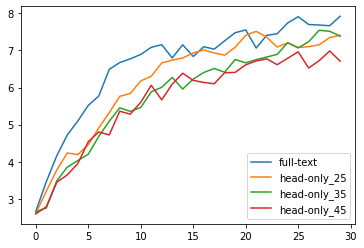

In [34]:
plt.plot(rougescores_fulltext['rouge2'], label = 'full-text')
plt.plot(rougescores_head25['rouge2'], label = 'head-only_25')
plt.plot(rougescores_head35['rouge2'], label = 'head-only_35')
plt.plot(rougescores_head45['rouge2'], label = 'head-only_45')
plt.legend()

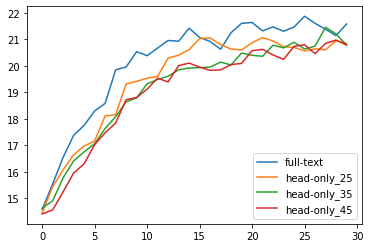

In [35]:
plt.plot(rougescores_fulltext['rougeLsum'], label = 'full-text')
plt.plot(rougescores_head25['rougeLsum'], label = 'head-only_25')
plt.plot(rougescores_head35['rougeLsum'], label = 'head-only_35')
plt.plot(rougescores_head45['rougeLsum'], label = 'head-only_45')
plt.legend()

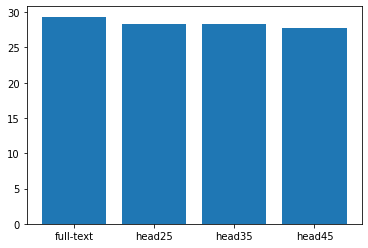

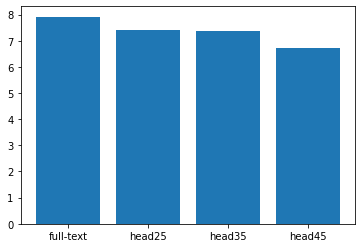

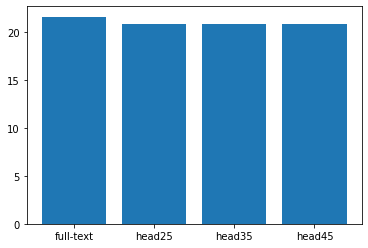

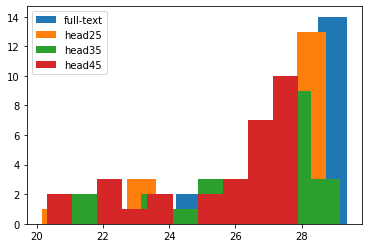

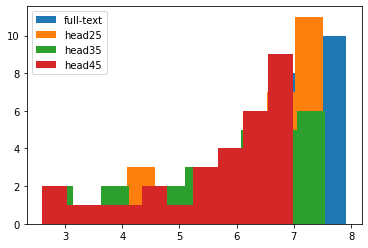

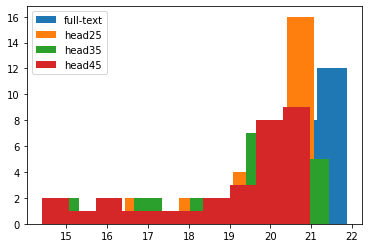

In [56]:
def barplot(score = 'rouge1'):
    scores = [
    rougescores_fulltext[score][-1],
    rougescores_head25[score][-1],
    rougescores_head35[score][-1],
    rougescores_head45[score][-1],
    ]
    lables = ['full-text', 'head25', 'head35', 'head45']
    plt.bar(lables,scores)
    plt.show()

def histplot(score = 'rouge1'):
    
    score_fulltext = rougescores_fulltext[score]
    score_head25 = rougescores_head25[score]
    score_head35 = rougescores_head35[score]
    score_head45 = rougescores_head45[score]
    
    plt.hist(score_fulltext,label = 'full-text')
    plt.hist(score_head25,label = 'head25')
    plt.hist(score_head35,label = 'head35')
    plt.hist(score_head45,label = 'head45')
    plt.legend()
    plt.show()
    
barplot('rouge1')
barplot('rouge2')
barplot('rougeLsum')

histplot('rouge1')
histplot('rouge2')
histplot('rougeLsum')

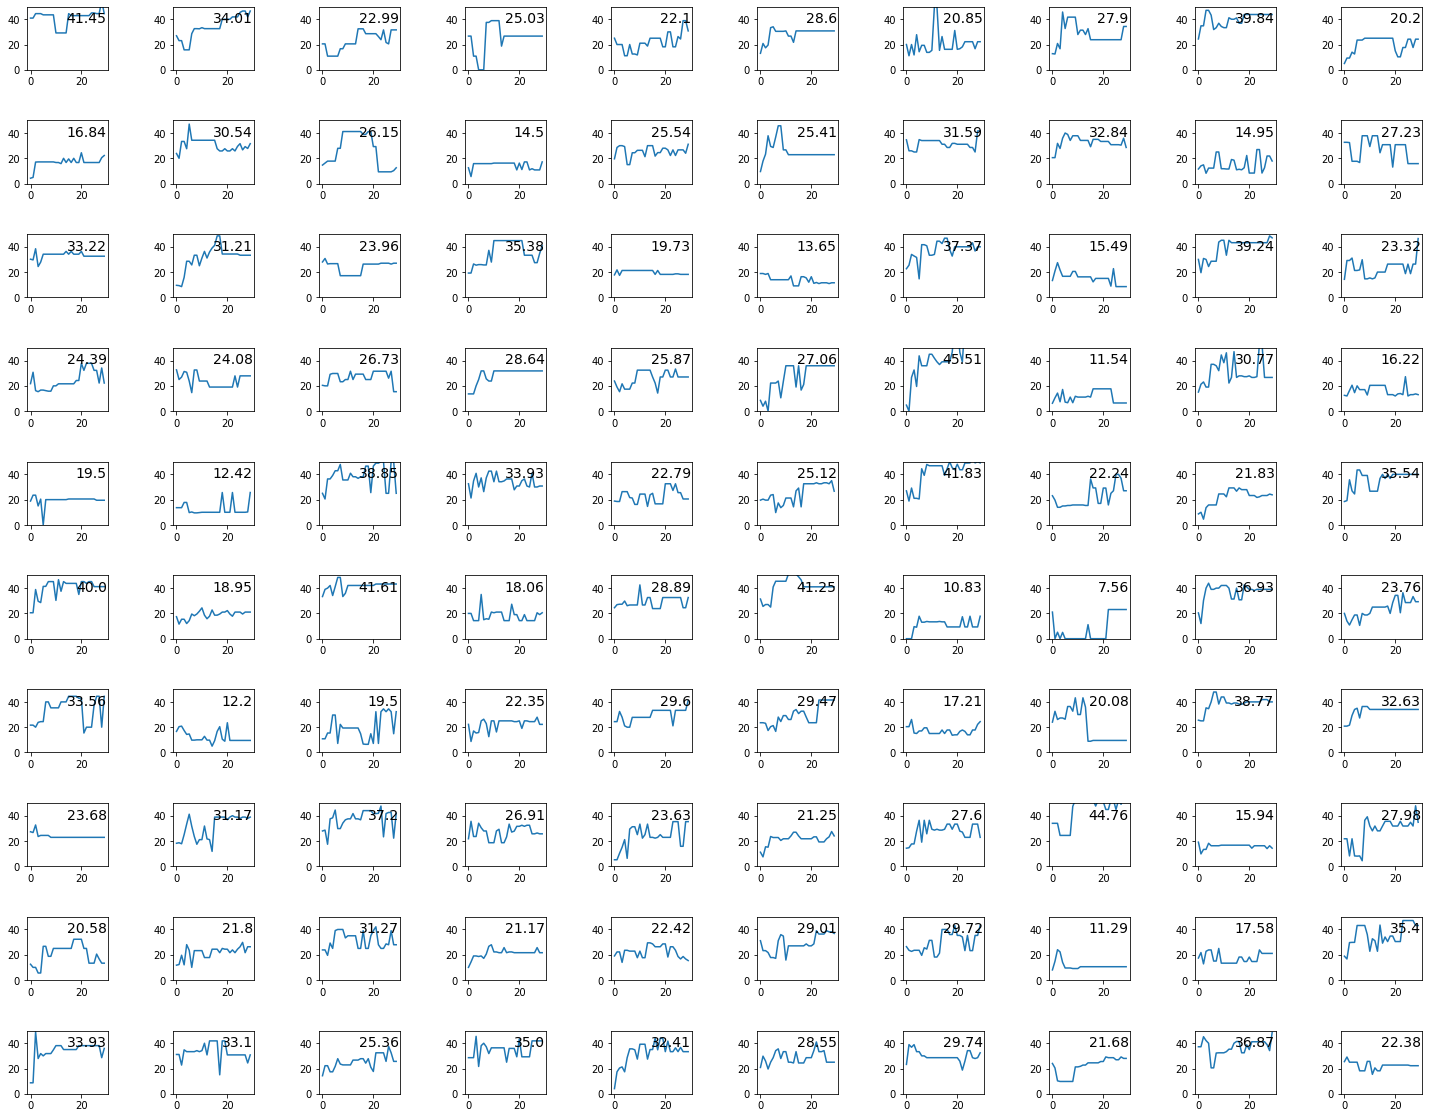

In [65]:
EPOCH = 30
model = 't5-small'
path = f"""../model/{model_params["MODEL"]}_{data}_full-text/"""
def dev(n):
    scores = []
    for epoch in range(EPOCH):
        path_df = os.path.join(path, f"result_eval/predictions_{model}_epoch{epoch}.csv")
        df = pd.read_csv(path_df)
        _id = df['Sample ids'][n]
        scores.append(df['RougeScore1'][df['Sample ids']==_id])
    return scores

fig = plt.figure(figsize=(25, 20))
fig.subplots_adjust(hspace=0.8, wspace=0.8)

for n in range(0,100):
    ax = fig.add_subplot(10, 10, n + 1)
    scores = dev(n)
    ax.plot(scores)
    ax.text(30, 35, str(np.round(np.mean(scores),2)),
         fontsize=14, weight = 'medium', ha='right', va = 'bottom')
    ax.set_ylim([0,50])  

#### Test ROUGE 

In [42]:
from datasets import load_metric
metric = load_metric("rouge")

In [38]:
score = metric.compute(predictions=['my name is beau'], references=['my name is not fabby']) 

In [39]:
score

{'rouge1': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), mid=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), high=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665)),
 'rouge2': AggregateScore(low=Score(precision=0.6666666666666666, recall=0.5, fmeasure=0.5714285714285715), mid=Score(precision=0.6666666666666666, recall=0.5, fmeasure=0.5714285714285715), high=Score(precision=0.6666666666666666, recall=0.5, fmeasure=0.5714285714285715)),
 'rougeL': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), mid=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), high=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665)),
 'rougeLsum': AggregateScore(low=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), mid=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665), high=Score(precision=0.75, recall=0.6, fmeasure=0.6666666666666665))}

In [40]:
score = {key: value.mid.fmeasure * 100 for key, value in score.items()}

In [41]:
score

{'rouge1': 66.66666666666666,
 'rouge2': 57.14285714285715,
 'rougeL': 66.66666666666666,
 'rougeLsum': 66.66666666666666}